In [3]:
# 三大件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("E:\project\python\machineLearning\ML_BeiFeng\data\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frequency')

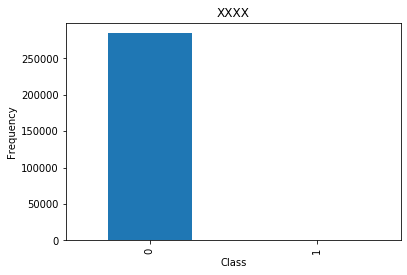

In [5]:
count_classes \
    = pd.value_counts(data["Class"], sort = True).sort_index()
count_classes.plot(kind="bar")
plt.title("XXXX")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [6]:
# 标准化的模块
from sklearn.preprocessing import StandardScaler

data["normAmount"] = StandardScaler().fit_transform(data["Amount"].values.reshape(-1, 1))
data = data.drop(["Time","Amount"], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [7]:
# 下采样策略, 即从多的数据中选取和少的数据个数一样多的部分。

# 取出X， Y
X = data.iloc[:, data.columns != 'Class']
Y = data.iloc[:, data.columns == 'Class']

# 取出Class == 1的部分
fraud_index = np.array(data[data.Class == 1].index)  # 取出
number_record_fraud = fraud_index.size   # 统计个数

# 取出Class == 0 的部分
normal_index = np.array(data[data.Class == 0].index)

# 对 Class == 0 的部分进行随机选择
random_normal_index = np.random.choice(normal_index, number_record_fraud , replace=False)
random_normal_index = np.array(random_normal_index)  # 转化成array

# 合并数据
under_sample_index = np.concatenate([fraud_index, random_normal_index])

# 下采样策略
under_sample_data = data.iloc[under_sample_index, :]
X_under_sample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
Y_under_sample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# 参看结果
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))

print("X_under_sample", X_under_sample.shape)
print("Y_under_sample", Y_under_sample.shape)

print("Total number of transactions in under sample data : ", len(under_sample_data))


Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
X_under_sample (984, 29)
Y_under_sample (984, 1)
Total number of transactions in under sample data :  984


In [11]:
# 交叉验证
from sklearn.model_selection import train_test_split

# random_state 表示用非规律的方式切分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

print("Number transaction train dataset: ", len(X_train))
print("Number transaction test dataset: ", len(X_test))
print("Total number of transaction", len(X_train) + len(X_test))

print("------------------------------------------")

X_train_under_sample, X_test_under_sample, Y_train_under_sample, Y_test_under_sample = train_test_split(X_under_sample, Y_under_sample, test_size = 0.3, random_state = 0)

print("Number transaction train dataset: ", len(X_train_under_sample))
print("Number transaction test dataset: ", len(X_test_under_sample))
print("Total number of transaction", len(X_train_under_sample) + len(X_test_under_sample))

Number transaction train dataset:  199364
Number transaction test dataset:  85443
Total number of transaction 284807
------------------------------------------
Number transaction train dataset:  688
Number transaction test dataset:  296
Total number of transaction 984


In [33]:
# TP, true positive, （√）一个正例被判定为正例
# FP, false positive, （×）一个负例被判断为正例
# FN, false negative, （×）一个正例被判断为负例
# TN, true negative, （√）一个负例被判断为负例
# Recall = TP/(TP + FN)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score, classification_report

def printing_Kfold_scores(X_train_data, Y_train_data):
    kf = KFold(n_splits=5,shuffle=False)
    fold = kf.split(Y_train_data)
    c_param_range = [0.01, 0.1, 1, 10, 100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    j = 0
    for c_param in c_param_range:
        print("++++++++++++++++++++++++++++++++++++++++++++")
        print("C_parameter: ", c_param )
        print("++++++++++++++++++++++++++++++++++++++++++++")
        recall_accs = []

        for iteration, index in enumerate(fold, start=1):
            # 调用具有特定 C 参数的逻辑回归模型
            logistic_regression = LogisticRegression(C = c_param, penalty= "l1")
            # 使用训练数据来拟合模型。
            # 带索引 {0}。然后，我们预测分配给"测试交叉验证"的部分
            logistic_regression.fit(X_train_data.iloc[index[0], :], Y_train_data.iloc[index[1],:].values)

            # 预测结果
            Y_predict_under_sample = logistic_regression.predict(X_train_data.iloc[index[1],:].values)

            recall_acc = recall_score(Y_train_data.iloc[index[1], :].values, Y_predict_under_sample)
            recall_accs.append(recall_acc)
            print(': recall score = ', recall_acc)
        results_table.iloc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')
    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']

    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    return best_c

best_c = printing_Kfold_scores(X_train_under_sample,Y_train_under_sample)

++++++++++++++++++++++++++++++++++++++++++++
C_parameter:  0.01
++++++++++++++++++++++++++++++++++++++++++++


ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [30]:
best_c = printing_Kfold_scores(X_train_under_sample,Y_train_under_sample)


++++++++++++++++++++++++++++++++++++++++++++
C_parameter:  0.01
++++++++++++++++++++++++++++++++++++++++++++


ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.